*Name: Vaidehi Anant Vatsaraj* <br>
*UID: 2018130060*

#Experiment 3 - Naive Bayes Classifier

Objective:

(i) Apply Naive bayes classifier for given data see Naive_bayes_handout.zip file in edmodo.

(ii) Apply and compare Linear Discriminating Analysis with Naive bayes classifiers w.r.t. error, specificity and sensitivity

I have applied Naive Bayes Classifier for Text Classification of sms text.

Dataset:<br>
The dataset contains Spam and Ham messages. We have the text and its category. 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pandas as pd
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Exploratory Data Analysis

In [43]:
data = pd.read_csv('emails.csv',engine='python')

In [44]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [45]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Our dataset has Message and Category columns which consist of object data type. There are 5572 messages. We have to check whether the category data is balanced or not.

In [47]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

The Spam category has 24% of the entire dataset.

As we can see above, the dataset is unbalanced. We have to consider this when we build our model. 

##Data Prerpocessing

####Converting to lower and tokenizing

In [48]:
tokenized_messages = data['text'].str.lower().apply(word_tokenize)

print(tokenized_messages)

0       [subject, :, naturally, irresistible, your, co...
1       [subject, :, the, stock, trading, gunslinger, ...
2       [subject, :, unbelievable, new, homes, made, e...
3       [subject, :, 4, color, printing, special, requ...
4       [subject, :, do, not, have, money, ,, get, sof...
                              ...                        
5723    [subject, :, re, :, research, and, development...
5724    [subject, :, re, :, receipts, from, visit, jim...
5725    [subject, :, re, :, enron, case, study, update...
5726    [subject, :, re, :, interest, david, ,, please...
5727    [subject, :, news, :, aurora, 5, ., 2, update,...
Name: text, Length: 5728, dtype: object


####Removing non-alphanumeric characters

In [49]:
def alpha(tokens):
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

tokenized_messages = tokenized_messages.apply(alpha)

print(tokenized_messages)

0       [subject, naturally, irresistible, your, corpo...
1       [subject, the, stock, trading, gunslinger, fan...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, color, printing, special, request, a...
4       [subject, do, not, have, money, get, software,...
                              ...                        
5723    [subject, re, research, and, development, char...
5724    [subject, re, receipts, from, visit, jim, than...
5725    [subject, re, enron, case, study, update, wow,...
5726    [subject, re, interest, david, please, call, s...
5727    [subject, news, aurora, update, aurora, versio...
Name: text, Length: 5728, dtype: object


####Removing stop words

In [50]:
def remove_stop_words(tokens):
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

tokenized_messages = tokenized_messages.apply(remove_stop_words)

print(tokenized_messages)

0       [subject, naturally, irresistible, corporate, ...
1       [subject, stock, trading, gunslinger, fanny, m...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, color, printing, special, request, a...
4       [subject, money, get, software, cds, software,...
                              ...                        
5723    [subject, research, development, charges, gpg,...
5724    [subject, receipts, visit, jim, thanks, invita...
5725    [subject, enron, case, study, update, wow, day...
5726    [subject, interest, david, please, call, shirl...
5727    [subject, news, aurora, update, aurora, versio...
Name: text, Length: 5728, dtype: object


####Lemmatization

In [51]:
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token in tokens:
      lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

tokenized_messages = tokenized_messages.apply(lemmatize)

print(tokenized_messages)

0       subject naturally irresistible corporate ident...
1       subject stock trading gunslinger fanny merrill...
2       subject unbelievable new home made easy im wan...
3       subject color printing special request additio...
4       subject money get software cd software compati...
                              ...                        
5723    subject research development charge gpg forwar...
5724    subject receipt visit jim thanks invitation vi...
5725    subject enron case study update wow day super ...
5726    subject interest david please call shirley cre...
5727    subject news aurora update aurora version fast...
Name: text, Length: 5728, dtype: object


In [52]:
data['text'] = tokenized_messages

data.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


##Visualization

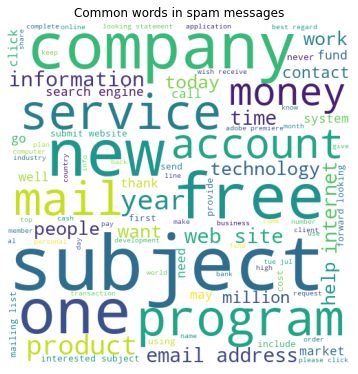

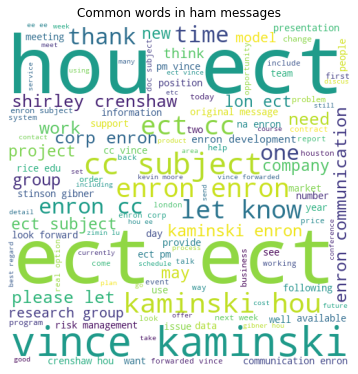

In [53]:
spam = data[data['spam']==1]['text'].str.cat(sep=', ')

ham = data[data['spam']==0]['text'].str.cat(sep=', ')

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

spam_wc = wc.generate(spam)
            
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(spam_wc) 
plt.axis("off") 
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0) 
plt.show() 
ham_wc = wc.generate(ham)
                   
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(ham_wc) 
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0) 
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


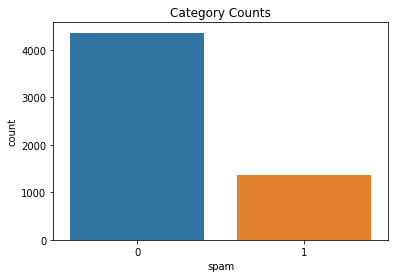

In [54]:
sns.countplot(data['spam'])
plt.title("Category Counts")
plt.show()

spam
0    145.089679
1    116.712719
Name: word_count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


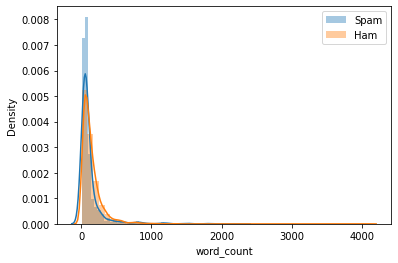

In [55]:
data['word_count'] = data['text'].str.split().str.len()

print(data.groupby('spam')['word_count'].mean())

sns.distplot(data[data['spam']==1]['word_count'], label='Spam')
sns.distplot(data[data['spam']==0]['word_count'], label='Ham'),
plt.legend()
plt.show()

##Dividing Data

In [56]:
X = data['text']
y = data['spam']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

##Tokenizing data

In [58]:
vectorizer = CountVectorizer(strip_accents='ascii')
train = vectorizer.fit_transform(X_train)
test = vectorizer.transform(X_test)

In [59]:
len(train.toarray()),len(test.toarray())

(4582, 1146)

In [60]:
X_train = pd.DataFrame(train.toarray(),columns=[i for i in range(len(train.toarray()[0]))])

In [61]:
X_test = pd.DataFrame(test.toarray(),columns=[i for i in range(len(test.toarray()[0]))])

In [62]:
nb = GaussianNB()

nb.fit(X_train, y_train)

print("Accuracy:",nb.score(X_test, y_test))

Accuracy: 0.9554973821989529


In [63]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [64]:
nb_lda = GaussianNB()

nb_lda.fit(X_train, y_train)

print("Accuracy:",nb_lda.score(X_test, y_test))

Accuracy: 0.9573385689354276


## Conclusion:<br>
* Processes such as tokenization, lemmatization, removing stop-words, converting to one single case are crucial to building a good model. <br> 
* The difference observed after applying LDA was found to be very less and I believe the small difference is owing to the heavy data processing performed.  